# Phoenix 2014 Dataset Analysis

In [1]:
import glob
import os
import pandas as pd
from collections import Counter

from wordcloud import WordCloud
import numpy as np
from matplotlib import pyplot as plt


In [2]:
os.chdir("/new_home/xzj23/workspace/SLR")
os.getcwd()

'/new_home/xzj23/workspace/SLR'

In [3]:
data_dir = "./data/phoenix2014"
features_dir = os.path.join(data_dir, "phoenix-2014-multisigner/features/fullFrame-210x260px")
annotations_dir = os.path.join(data_dir, "phoenix-2014-multisigner/annotations/manual")

## For Corpus

In [4]:
train_corpus = pd.read_csv(os.path.join(annotations_dir, "train.corpus.csv"), sep='|', header=0, index_col='id')
dev_corpus = pd.read_csv(os.path.join(annotations_dir, "dev.corpus.csv"), sep='|', header=0, index_col='id')
test_corpus = pd.read_csv(os.path.join(annotations_dir, "test.corpus.csv"), sep='|', header=0, index_col='id')
all_corpus = pd.concat([train_corpus, dev_corpus, test_corpus])

In [5]:
train_corpus

,folder,signer,annotation
id,,,
01April_2010_Thursday_heute_default-0,01April_2010_Thursday_heute_default-0/1/*.png,Signer04,__ON__ LIEB ZUSCHAUER ABEND WINTER GESTERN loc...
01April_2010_Thursday_heute_default-2,01April_2010_Thursday_heute_default-2/1/*.png,Signer04,loc-WEST WARM loc-WEST BLEIBEN KUEHL
01April_2010_Thursday_heute_default-3,01April_2010_Thursday_heute_default-3/1/*.png,Signer04,KUEHL KUEHL IN-KOMMEND NACHT MINUS loc-MINUS-P...
01April_2010_Thursday_heute_default-4,01April_2010_Thursday_heute_default-4/1/*.png,Signer04,MORGEN TEMPERATUR ACHT BIS DREIZEHN MAXIMAL DR...
01April_2010_Thursday_heute_default-6,01April_2010_Thursday_heute_default-6/1/*.png,Signer04,AUCH SAMSTAG WEST FREUNDLICH IX TROCKEN WEST R...
...,...,...,...
31October_2009_Saturday_tagesschau_default-4,31October_2009_Saturday_tagesschau_default-4/1...,Signer03,__ON__ NORD loc-REGION HEUTE NACHT SCHON WOLKE...
31October_2009_Saturday_tagesschau_default-6,31October_2009_Saturday_tagesschau_default-6/1...,Signer03,__ON__ AUCH STURM WEHEN WEHEN NORD SEE STURM l...
31October_2009_Saturday_tagesschau_default-10,31October_2009_Saturday_tagesschau_default-10/...,Signer03,__ON__ MORGEN loc-SECHS GRAD loc-SIEBENZEHN GR...


In [6]:
dev_corpus

,folder,signer,annotation
id,,,
01April_2010_Thursday_heute_default-1,01April_2010_Thursday_heute_default-1/1/*.png,Signer04,ICH OSTERN WETTER ZUFRIEDEN MITTAG TEMPERATUR ...
01August_2011_Monday_heute_default-6,01August_2011_Monday_heute_default-6/1/*.png,Signer07,VIELLEICHT THUERINGEN REGION AUCH BISSCHEN WOL...
01December_2011_Thursday_heute_default-3,01December_2011_Thursday_heute_default-3/1/*.png,Signer05,STUNDE AUCH MEISTENS REGEN ERST WEST DANN REGI...
01December_2011_Thursday_heute_default-5,01December_2011_Thursday_heute_default-5/1/*.png,Signer05,UND TAG BLEIBEN KUEHL SECHS GRAD BAYERN IX REG...
01February_2011_Tuesday_heute_default-6,01February_2011_Tuesday_heute_default-6/1/*.png,Signer08,MORGEN NORD MEHR MILD WEST SUEDOST BLEIBEN UNT...
...,...,...,...
31January_2013_Thursday_tagesschau_default-7,31January_2013_Thursday_tagesschau_default-7/1...,Signer01,__ON__ IX DANN SCHNEE KOENNEN
31January_2013_Thursday_tagesschau_default-8,31January_2013_Thursday_tagesschau_default-8/1...,Signer01,ABEND DANN NORD SCHNEE FLACH SCHNEE MAXIMAL WI...
31May_2011_Tuesday_heute_default-14,31May_2011_Tuesday_heute_default-14/1/*.png,Signer01,__ON__ HOFFEN REGION JETZT NORDOST VERLAUFEN V...


In [7]:
test_corpus

,folder,signer,annotation
id,,,
01April_2010_Thursday_heute_default-5,01April_2010_Thursday_heute_default-5/1/*.png,Signer04,ABER FREUEN MORGEN SONNE SELTEN REGEN
01April_2010_Thursday_tagesschau_default-7,01April_2010_Thursday_tagesschau_default-7/1/*...,Signer04,SAMSTAG WECHSELHAFT BESONDERS FREUNDLICH NORDO...
01April_2010_Thursday_tagesschau_default-8,01April_2010_Thursday_tagesschau_default-8/1/*...,Signer04,SONNTAG REGEN TEIL GEWITTER SUEDOST DURCH REGEN
01April_2011_Friday_tagesschau_default-0,01April_2011_Friday_tagesschau_default-0/1/*.png,Signer08,__ON__ JETZT WETTER WIE-AUSSEHEN MORGEN SAMSTA...
01April_2011_Friday_tagesschau_default-6,01April_2011_Friday_tagesschau_default-6/1/*.png,Signer08,__ON__ FLUSS NORDOST HEUTE ABEND NOCH WOLKE KO...
...,...,...,...
31January_2013_Thursday_tagesschau_default-13,31January_2013_Thursday_tagesschau_default-13/...,Signer01,TAG SAUER LAND VIER REGION ZWOELF GRAD __OFF__
31March_2010_Wednesday_tagesschau_default-0,31March_2010_Wednesday_tagesschau_default-0/1/...,Signer01,__ON__ MORGEN WETTER WIE-AUSSEHEN ERSTE APRIL...
31March_2010_Wednesday_tagesschau_default-2,31March_2010_Wednesday_tagesschau_default-2/1/...,Signer01,__ON__ HEUTE NACHT TIEF KOMMEN AUCH KUEHL AUFZ...


In [8]:
all_corpus

,folder,signer,annotation
id,,,
01April_2010_Thursday_heute_default-0,01April_2010_Thursday_heute_default-0/1/*.png,Signer04,__ON__ LIEB ZUSCHAUER ABEND WINTER GESTERN loc...
01April_2010_Thursday_heute_default-2,01April_2010_Thursday_heute_default-2/1/*.png,Signer04,loc-WEST WARM loc-WEST BLEIBEN KUEHL
01April_2010_Thursday_heute_default-3,01April_2010_Thursday_heute_default-3/1/*.png,Signer04,KUEHL KUEHL IN-KOMMEND NACHT MINUS loc-MINUS-P...
01April_2010_Thursday_heute_default-4,01April_2010_Thursday_heute_default-4/1/*.png,Signer04,MORGEN TEMPERATUR ACHT BIS DREIZEHN MAXIMAL DR...
01April_2010_Thursday_heute_default-6,01April_2010_Thursday_heute_default-6/1/*.png,Signer04,AUCH SAMSTAG WEST FREUNDLICH IX TROCKEN WEST R...
...,...,...,...
31January_2013_Thursday_tagesschau_default-13,31January_2013_Thursday_tagesschau_default-13/...,Signer01,TAG SAUER LAND VIER REGION ZWOELF GRAD __OFF__
31March_2010_Wednesday_tagesschau_default-0,31March_2010_Wednesday_tagesschau_default-0/1/...,Signer01,__ON__ MORGEN WETTER WIE-AUSSEHEN ERSTE APRIL...
31March_2010_Wednesday_tagesschau_default-2,31March_2010_Wednesday_tagesschau_default-2/1/...,Signer01,__ON__ HEUTE NACHT TIEF KOMMEN AUCH KUEHL AUFZ...


{'Train Set Size': 5672, 'Dev Set Size': 540, 'Test Set Size': 629, 'All Set Size': 6841}


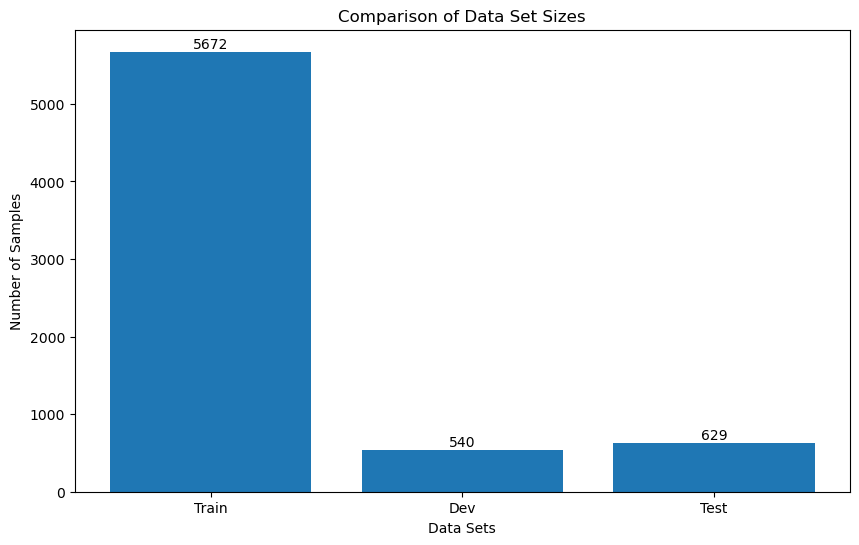

In [9]:
print({"Train Set Size": train_corpus.__len__(), "Dev Set Size": dev_corpus.__len__(),
       "Test Set Size": test_corpus.__len__(), "All Set Size": all_corpus.__len__()})
# 设置绘图参数
plt.figure(figsize=(10, 6))

# 绘制直方图
labels = ['Train', 'Dev', 'Test']
sizes = [train_corpus.__len__(), dev_corpus.__len__(), test_corpus.__len__()]

# 创建直方图
plt.bar(labels, sizes)

# 添加标题和标签
plt.title('Comparison of Data Set Sizes')
plt.xlabel('Data Sets')
plt.ylabel('Number of Samples')

# 显示数值
for i, v in enumerate(sizes):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

# 显示图形
plt.show()


## For Annotations

In [10]:
def plot_word_frequencies(word_counts, title):
    words, counts = zip(*word_counts.most_common(20))
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    # 显示数值
    for i, v in enumerate(counts):
        plt.text(i, v + 1, str(v), ha='center', va='bottom')
    plt.show()

In [11]:
def generate_word_cloud(word_counts, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

Counter({'REGEN': 3200, '__OFF__': 2687, '__ON__': 2510, 'IX': 1542, 'MORGEN': 1286, 'WOLKE': 1186, 'SONNE': 1159, 'GRAD': 1098, '__EMOTION__': 944, 'WEHEN': 930, 'REGION': 929, 'loc-REGION': 909, '__PU__': 859, 'SCHNEE': 856, 'NACHT': 822, 'GEWITTER': 798, 'KOENNEN': 769, 'MEHR': 765, 'AUCH': 717, 'cl-KOMMEN': 715, 'SCHAUER': 711, 'HEUTE': 711, 'BISSCHEN': 711, 'KOMMEN': 705, 'BIS': 665, 'WETTER': 663, 'SUED': 660, 'NORD': 655, 'WIND': 651, 'DANN': 491, 'ZWANZIG': 475, '__LEFTHAND__': 474, 'NEBEL': 451, 'OST': 439, 'ABEND': 426, 'MOEGLICH': 423, 'FREUNDLICH': 415, 'JETZT': 400, 'BERG': 394, 'TEIL': 389, 'STURM': 389, 'MAESSIG': 367, 'WECHSELHAFT': 360, 'ABER': 359, 'TAG': 351, 'WEST': 346, 'FLUSS': 335, 'TIEF': 331, 'WIE-AUSSEHEN': 316, 'MINUS': 313, 'SCHWACH': 307, 'MITTE': 300, 'NORDRAUM': 299, 'BLEIBEN': 295, 'SONNTAG': 291, 'KUEHL': 287, 'FREITAG': 286, 'KLAR': 281, 'VIEL': 280, 'SAMSTAG': 275, 'TROCKEN': 274, 'HOCH': 273, 'STARK': 264, 'loc-NORD': 262, 'DONNERSTAG': 259, 'BESONDE

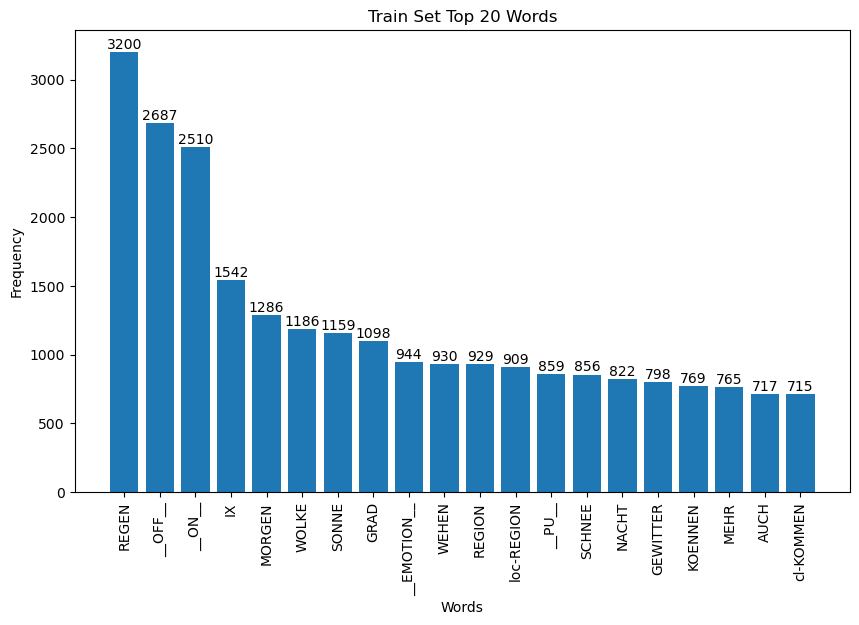

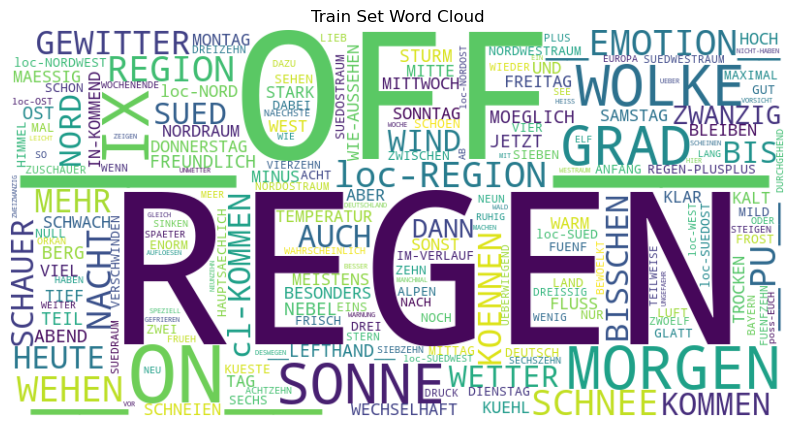

In [12]:
# train set
train_annotations = train_corpus.annotation.tolist()
train_word_counts = Counter(sum([a.split() for a in train_annotations], []))
print(train_word_counts)
plot_word_frequencies(train_word_counts, "Train Set Top 20 Words")
generate_word_cloud(train_word_counts, "Train Set Word Cloud")

Counter({'__OFF__': 256, '__ON__': 246, 'REGEN': 195, 'REGION': 162, 'MORGEN': 135, 'IX': 129, 'NORD': 113, 'GRAD': 109, 'KOMMEN': 105, 'SONNE': 100, 'WOLKE': 98, 'NACHT': 82, 'KOENNEN': 79, 'SCHNEE': 78, 'AUCH': 73, 'WETTER': 70, 'BISSCHEN': 70, 'SUED': 64, 'BIS': 64, 'MEHR': 62, 'HEUTE': 61, 'WIND': 61, 'DANN': 55, 'GEWITTER': 52, 'ZWANZIG': 49, 'OST': 48, 'WEST': 46, 'WEHEN': 44, 'MOEGLICH': 42, 'WIE-AUSSEHEN': 41, 'JETZT': 41, 'ABER': 40, 'TAG': 40, 'BERG': 40, 'SCHAUER': 39, 'FLUSS': 38, 'STURM': 37, 'ABEND': 36, 'SUEDOST': 35, 'HOCH': 35, 'NORDWEST': 34, 'MINUS': 34, 'FREUNDLICH': 33, 'TEIL': 32, 'MITTE': 31, 'TIEF': 30, 'STARK': 29, 'SONNTAG': 29, 'WARM': 27, 'NEBEL': 27, 'KLAR': 27, 'SUEDWEST': 26, 'TROCKEN': 26, 'SCHWACH': 26, 'UND': 25, 'MAESSIG': 25, 'KUEHL': 24, 'IN-KOMMEND': 24, 'FREITAG': 24, 'VIEL': 23, 'BLEIBEN': 23, 'MEISTENS': 22, 'DEUTSCH': 22, 'TEMPERATUR': 21, 'SAMSTAG': 21, 'BESONDERS': 21, 'MITTWOCH': 21, 'DABEI': 20, 'DREI': 19, 'IM-VERLAUF': 19, 'LUFT': 19, 'NO

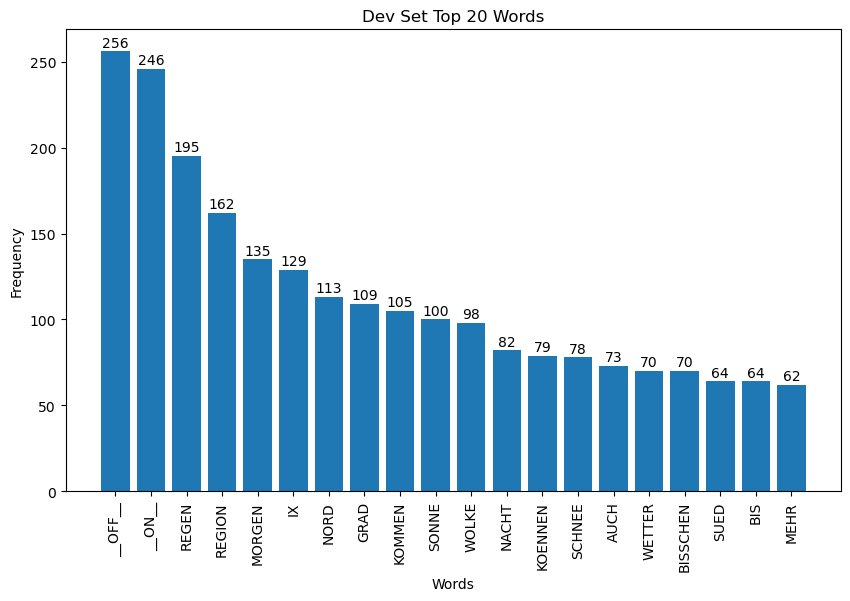

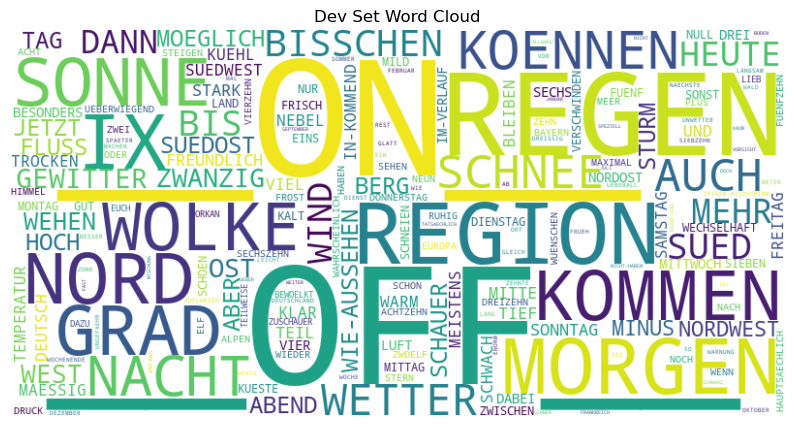

In [13]:
# dev set
dev_annotations = dev_corpus.annotation.tolist()
dev_word_counts = Counter(sum([a.split() for a in dev_annotations], []))
print(dev_word_counts)
plot_word_frequencies(dev_word_counts, "Dev Set Top 20 Words")
generate_word_cloud(dev_word_counts, "Dev Set Word Cloud")

Counter({'__OFF__': 333, '__ON__': 309, 'REGEN': 224, 'REGION': 218, 'IX': 157, 'MORGEN': 151, 'KOMMEN': 132, 'NORD': 132, 'WOLKE': 126, 'SONNE': 123, 'GRAD': 114, 'NACHT': 90, 'SUED': 89, 'AUCH': 84, 'SCHNEE': 84, 'WETTER': 83, 'KOENNEN': 81, 'GEWITTER': 80, 'HEUTE': 79, 'WIND': 74, 'MEHR': 73, 'BISSCHEN': 72, 'OST': 62, 'WEHEN': 59, 'SCHAUER': 56, 'DANN': 56, 'BIS': 52, 'ZWANZIG': 50, 'WEST': 49, 'FREUNDLICH': 48, 'NEBEL': 47, 'WIE-AUSSEHEN': 45, 'NORDWEST': 44, 'SONST': 44, 'MOEGLICH': 44, 'WECHSELHAFT': 42, 'ABER': 40, 'STURM': 39, 'SUEDOST': 38, 'ABEND': 38, 'BERG': 38, 'JETZT': 36, 'TAG': 35, 'SAMSTAG': 34, 'SONNTAG': 34, 'FLUSS': 34, 'SCHWACH': 34, 'DONNERSTAG': 34, 'TROCKEN': 33, 'IN-KOMMEND': 32, 'STARK': 32, 'VIEL': 32, 'BESONDERS': 30, 'KUEHL': 30, 'WARM': 30, 'FREITAG': 30, 'TIEF': 28, 'KLAR': 28, 'NORDOST': 27, 'FUENF': 27, 'MAESSIG': 26, 'HOCH': 26, 'LAND': 26, 'MINUS': 26, 'MONTAG': 25, 'BLEIBEN': 25, 'DEUTSCH': 25, 'TEIL': 24, 'MEISTENS': 24, 'GUT': 23, 'SCHNEIEN': 23, 

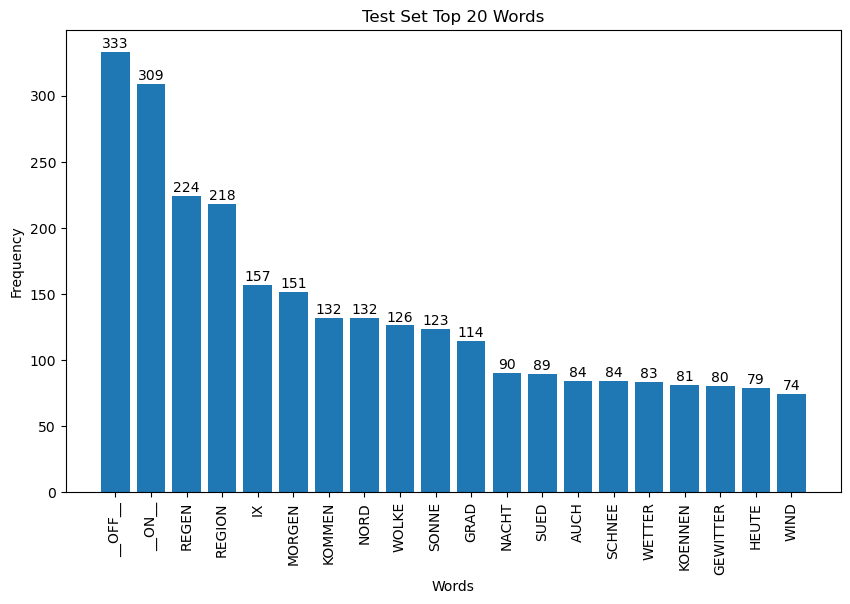

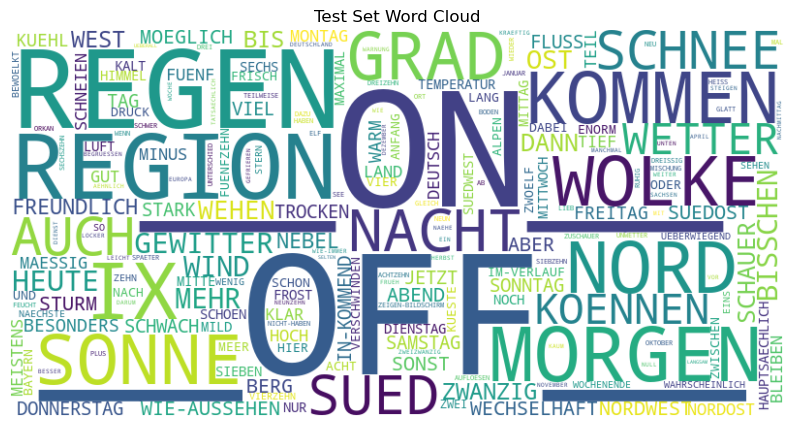

In [14]:
# test set
test_annotations = test_corpus.annotation.tolist()
test_word_counts = Counter(sum([a.split() for a in test_annotations], []))
print(test_word_counts)
plot_word_frequencies(test_word_counts, "Test Set Top 20 Words")
generate_word_cloud(test_word_counts, "Test Set Word Cloud")

Counter({'REGEN': 3619, '__OFF__': 3276, '__ON__': 3065, 'IX': 1828, 'MORGEN': 1572, 'WOLKE': 1410, 'SONNE': 1382, 'GRAD': 1321, 'REGION': 1309, 'WEHEN': 1033, 'SCHNEE': 1018, 'NACHT': 994, '__EMOTION__': 944, 'KOMMEN': 942, 'GEWITTER': 930, 'KOENNEN': 929, 'loc-REGION': 909, 'MEHR': 900, 'NORD': 900, 'AUCH': 874, '__PU__': 859, 'BISSCHEN': 853, 'HEUTE': 851, 'WETTER': 816, 'SUED': 813, 'SCHAUER': 806, 'WIND': 786, 'BIS': 781, 'cl-KOMMEN': 715, 'DANN': 602, 'ZWANZIG': 574, 'OST': 549, 'NEBEL': 525, 'MOEGLICH': 509, 'ABEND': 500, 'FREUNDLICH': 496, 'JETZT': 477, '__LEFTHAND__': 474, 'BERG': 472, 'STURM': 465, 'TEIL': 445, 'WEST': 441, 'ABER': 439, 'TAG': 426, 'WECHSELHAFT': 420, 'MAESSIG': 418, 'FLUSS': 407, 'WIE-AUSSEHEN': 402, 'TIEF': 389, 'MINUS': 373, 'SCHWACH': 367, 'SONNTAG': 354, 'MITTE': 350, 'BLEIBEN': 343, 'KUEHL': 341, 'FREITAG': 340, 'KLAR': 336, 'VIEL': 335, 'HOCH': 334, 'TROCKEN': 333, 'SAMSTAG': 330, 'STARK': 325, 'DONNERSTAG': 307, 'SONST': 307, 'BESONDERS': 305, 'NORDRA

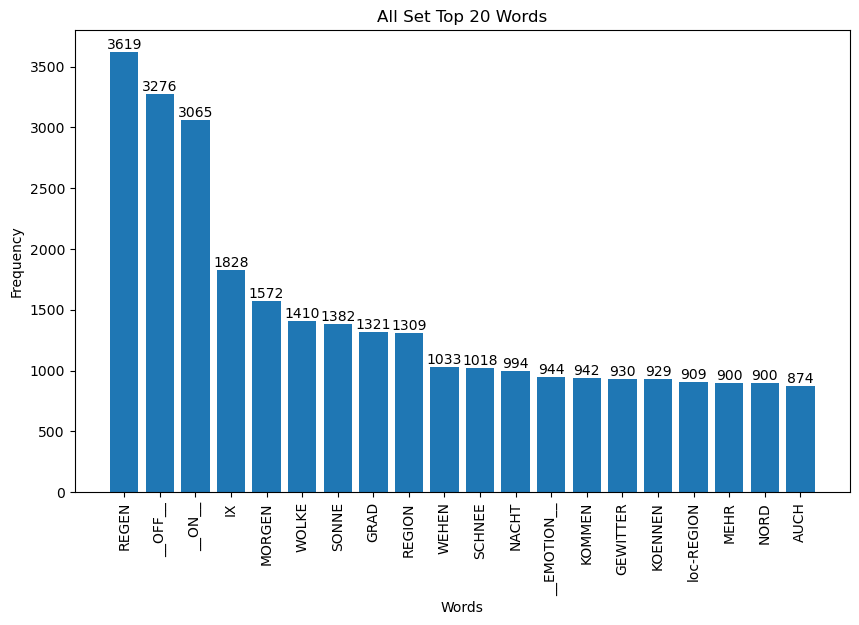

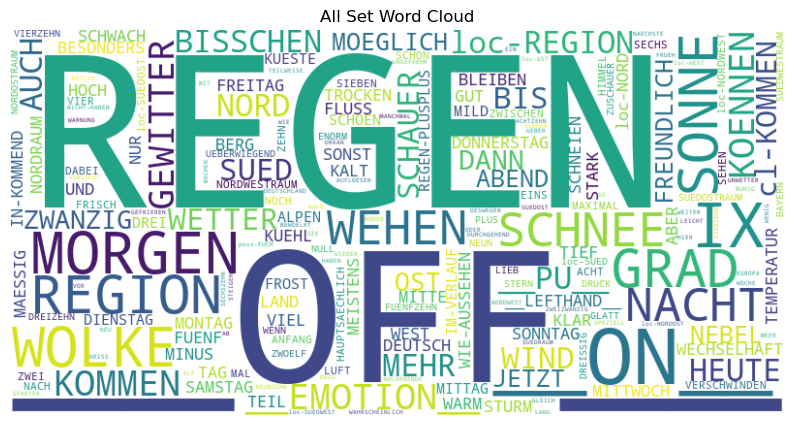

In [15]:
# all set
all_annotations = all_corpus.annotation.tolist()
all_word_counts = Counter(sum([a.split() for a in all_annotations], []))
print(all_word_counts)
plot_word_frequencies(all_word_counts, "All Set Top 20 Words")
generate_word_cloud(all_word_counts, "All Set Word Cloud")

## For Singers

In [16]:
def plot_signer_distribution(signer_counts):
    """
    绘制不同 signer 的数量分布直方图，并按数量排序。
    
    参数:
    signer_counts (Counter): 包含每个 signer 数量的 Counter 对象。
    """
    # 将 Counter 转换为列表并排序
    sorted_signer_counts = sorted(signer_counts.items(), key=lambda x: x[1], reverse=True)

    # 提取标签和数量
    labels, values = zip(*sorted_signer_counts)

    # 绘制直方图
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='skyblue')

    # 添加标题和标签
    plt.title('Distribution of Signers in Train Corpus')
    plt.xlabel('Signers')
    plt.ylabel('Count')

    # 显示数值
    for i, v in enumerate(values):
        plt.text(i, v + 1, str(v), ha='center', va='bottom')

    # 显示图形
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Counter({'Signer01': 1475, 'Signer05': 1296, 'Signer04': 836, 'Signer08': 704, 'Signer07': 647, 'Signer03': 470, 'Signer09': 165, 'Signer02': 49, 'Signer06': 30})


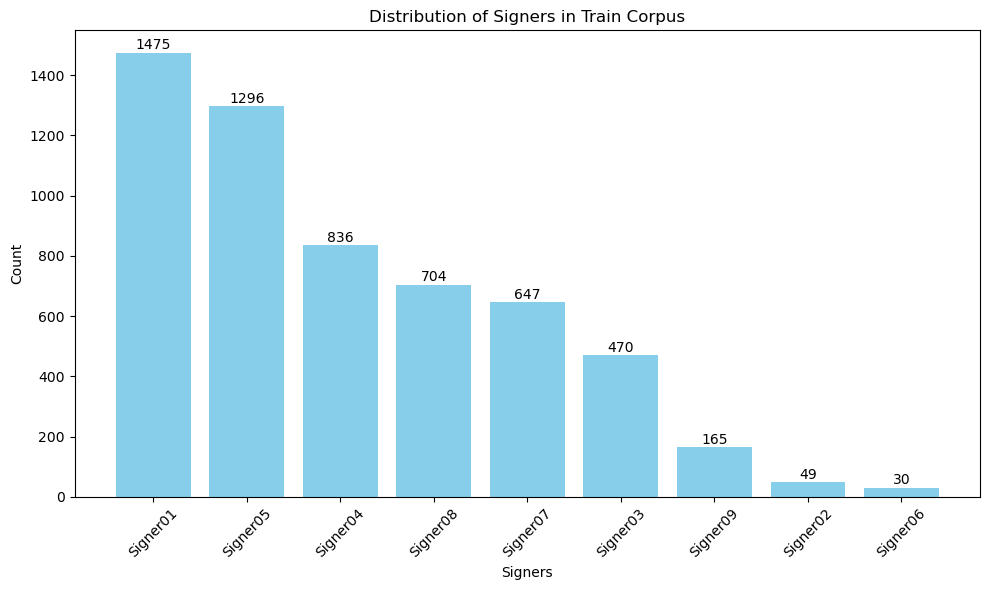

In [17]:
# train set
counts = Counter(train_corpus.signer.tolist())
print(counts)
plot_signer_distribution(counts)

Counter({'Signer01': 149, 'Signer05': 111, 'Signer07': 71, 'Signer04': 69, 'Signer08': 63, 'Signer03': 47, 'Signer09': 18, 'Signer06': 8, 'Signer02': 4})


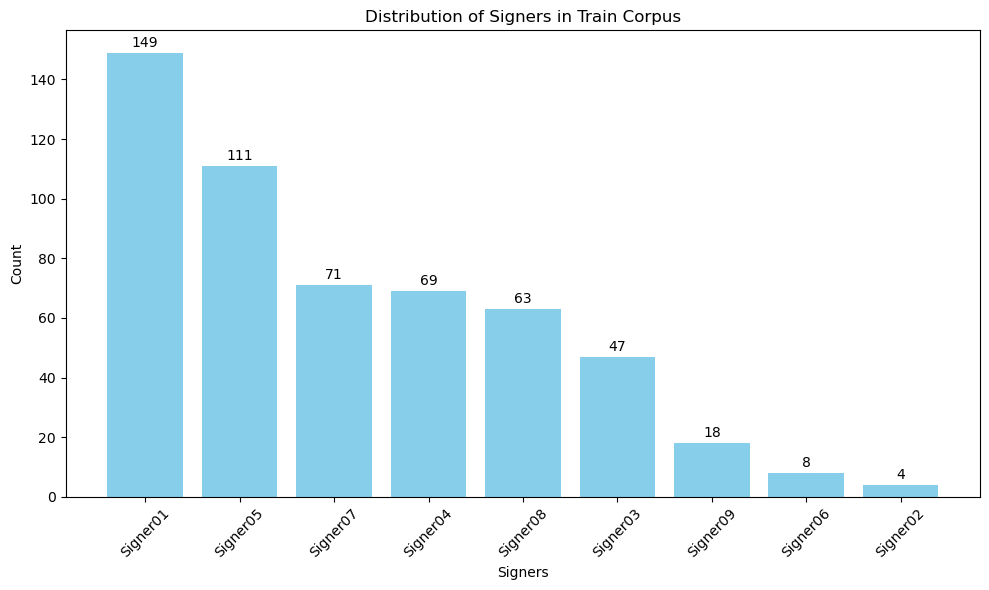

In [18]:
# dev set
counts = Counter(dev_corpus.signer.tolist())
print(counts)
plot_signer_distribution(counts)

Counter({'Signer01': 181, 'Signer05': 180, 'Signer04': 81, 'Signer08': 67, 'Signer07': 57, 'Signer03': 45, 'Signer09': 12, 'Signer02': 3, 'Signer06': 3})


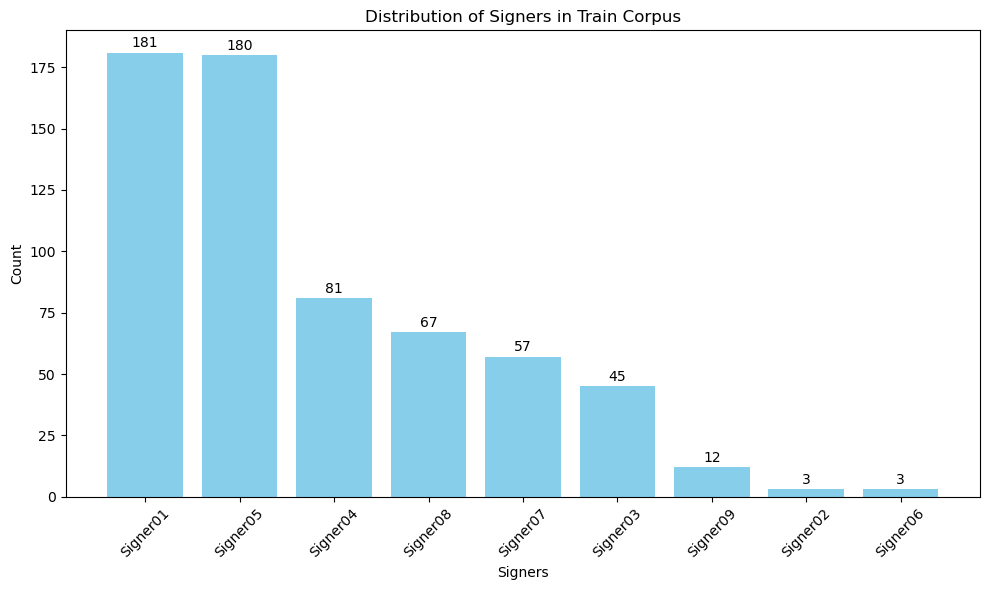

In [19]:
# test set
counts = Counter(test_corpus.signer.tolist())
print(counts)
plot_signer_distribution(counts)

Counter({'Signer01': 1805, 'Signer05': 1587, 'Signer04': 986, 'Signer08': 834, 'Signer07': 775, 'Signer03': 562, 'Signer09': 195, 'Signer02': 56, 'Signer06': 41})


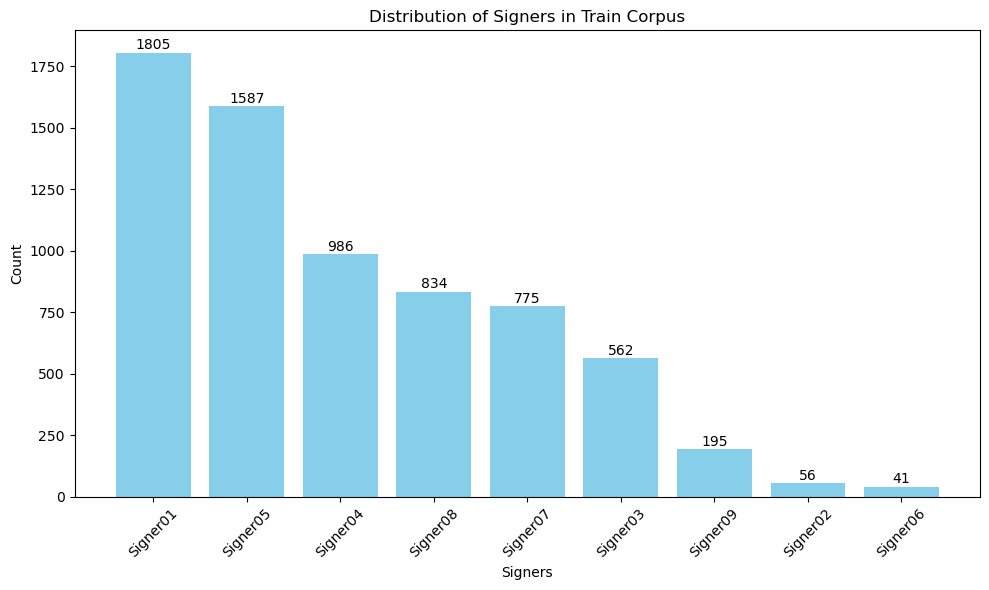

In [20]:
# all set
counts = Counter(all_corpus.signer.tolist())
print(counts)
plot_signer_distribution(counts)

# For Frames and Annotations Length

In [21]:
def get_length_counts(corpus, mode):
    length_counts = dict()
    for idx, row in corpus.iterrows():
        length_counts[idx] = (len(glob.glob(os.path.join(features_dir, mode, row.folder))),
                              len([word for word in row.annotation.split(' ') if word]))
    return length_counts


def plot_frames_length_and_annotation_length_distribution(length_counts):
    frames_lengths, annotation_lengths = zip(*length_counts.values())
    plt.figure(figsize=(10, 6))
    plt.hist(frames_lengths, bins=50, alpha=0.5, label='Frames Length')
    plt.hist(annotation_lengths, bins=50, alpha=0.5, label='Word Length')
    plt.legend(loc='upper right')
    plt.title('Distribution of Frames Length and Annotation Length')
    plt.xlabel('Length')
    plt.ylabel('Count')
    plt.show()
    print(
        f"Frames Length:\n"
        f"\tmean_std: {np.mean(frames_lengths):.2f} +/- {np.std(frames_lengths):.2f}\n"
        f"\tmin_max: {np.min(frames_lengths)} ~ {np.max(frames_lengths)}\n"
        f"\t5%_percentile: {np.percentile(frames_lengths, 5)} ~ {np.percentile(frames_lengths, 95)}"
    )
    print(
        f"Word Length:\n"
        f"\tmean_std: {np.mean(annotation_lengths):.2f} +/- {np.std(annotation_lengths):.2f}\n"
        f"\tmin_max: {np.min(annotation_lengths)} ~ {np.max(annotation_lengths)}\n"
        f"\t5%_percentile: {np.percentile(annotation_lengths, 5)} ~ {np.percentile(annotation_lengths, 95)}"
    )


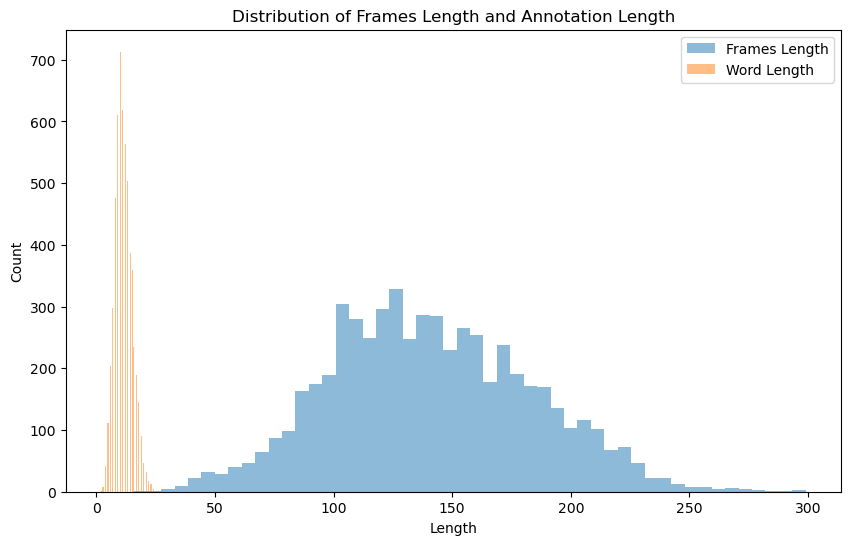

Frames Length:
	mean_std: 140.87 +/- 42.79
	min_max: 16 ~ 299
	5%_percentile: 75.0 ~ 214.0
Word Length:
	mean_std: 11.50 +/- 3.58
	min_max: 2 ~ 28
	5%_percentile: 6.0 ~ 18.0


In [22]:
# train set
train_length_counts = get_length_counts(train_corpus, 'train')
plot_frames_length_and_annotation_length_distribution(train_length_counts)

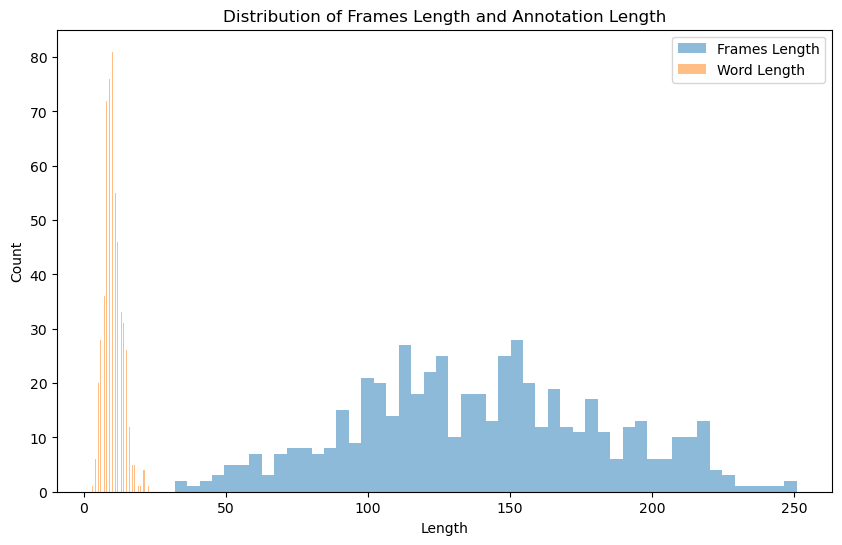

Frames Length:
	mean_std: 139.23 +/- 44.30
	min_max: 32 ~ 251
	5%_percentile: 66.95 ~ 215.0
Word Length:
	mean_std: 10.26 +/- 3.16
	min_max: 3 ~ 23
	5%_percentile: 5.950000000000003 ~ 16.0


In [23]:
# dev set
dev_length_counts = get_length_counts(dev_corpus, 'dev')
plot_frames_length_and_annotation_length_distribution(dev_length_counts)

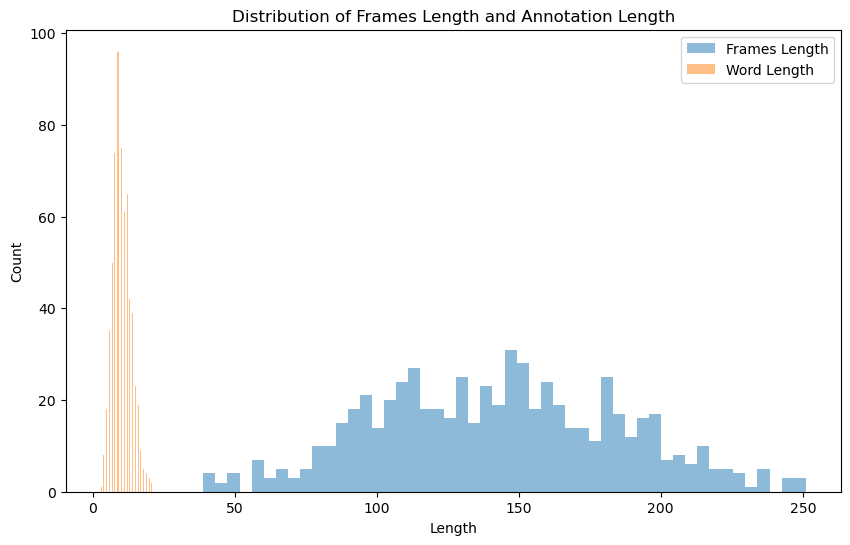

Frames Length:
	mean_std: 142.24 +/- 43.07
	min_max: 39 ~ 251
	5%_percentile: 76.4 ~ 213.0
Word Length:
	mean_std: 10.34 +/- 3.17
	min_max: 3 ~ 21
	5%_percentile: 6.0 ~ 16.0


In [24]:
# test set
test_length_counts = get_length_counts(test_corpus, 'test')
plot_frames_length_and_annotation_length_distribution(test_length_counts)

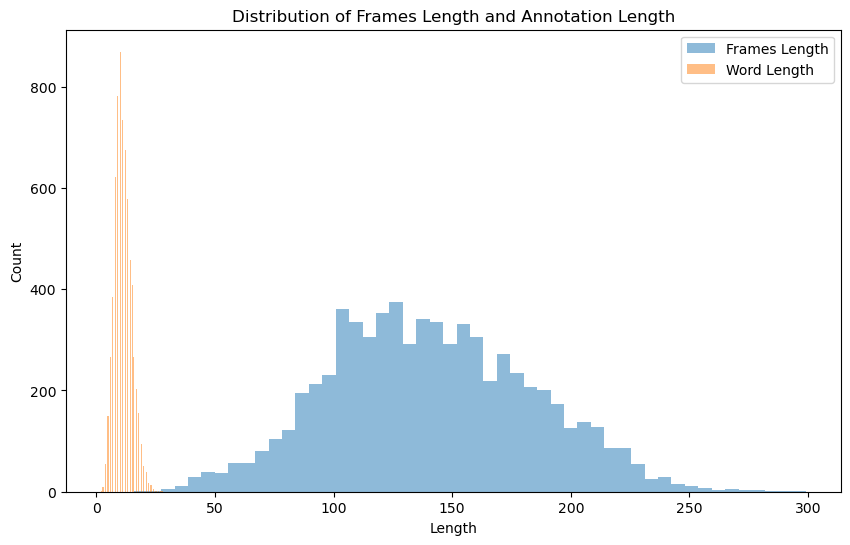

Frames Length:
	mean_std: 140.87 +/- 42.94
	min_max: 16 ~ 299
	5%_percentile: 74.0 ~ 214.0
Word Length:
	mean_std: 11.30 +/- 3.54
	min_max: 2 ~ 28
	5%_percentile: 6.0 ~ 18.0


In [25]:
# all set
all_length_counts = {**train_length_counts, **dev_length_counts, **test_length_counts}
plot_frames_length_and_annotation_length_distribution(all_length_counts)